# Capítulo 4

## Exemplo 4.2.1

O exemplo ilustra que a médias das realizações no instante $\tau$
diminui o efeito do ruído BRANCO no sinal.

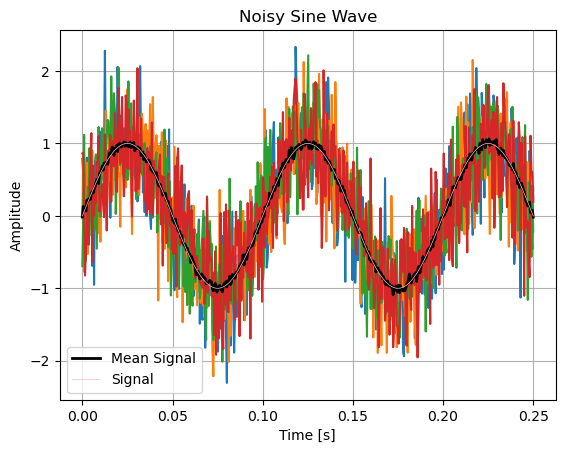

In [29]:
import matplotlib.pyplot as plt
import numpy as np


w = 2 * np.pi * 10
t = np.linspace(0, 0.25, 500)

e = np.random.normal(0, 0.5, t.shape)

signal = np.sin(w * t)

# Linhas = amostras,
# Colunas = Realizacoes
Ensembles = np.empty((len(t), 150))

for i in range(150):
    e = np.random.normal(0, 0.5, t.shape)
    Ensembles[:, i] = np.sin(w * t) + e

media = np.mean(Ensembles, axis=1)

plt.plot(t, Ensembles[:,:4])
plt.plot(t, media, color='black', linewidth=2, label='Mean Signal')
plt.plot(t, signal, color='pink', linewidth=0.5, label='Signal')
plt.title("Noisy Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


## Exemplo 4.2.4

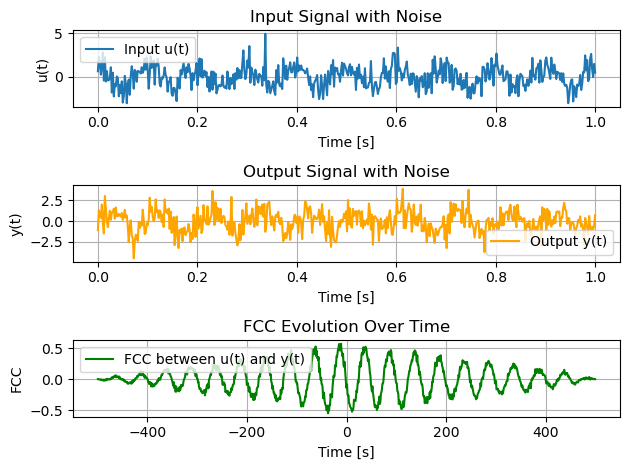

In [89]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1, 500)

w = 2 * np.pi * 10
A = 1
e = np.random.normal(0, 1, t.shape)
v = np.random.normal(0, 1, t.shape)


u = A * np.cos(w*t) + e
y = A * np.sin(w*t) + v

# Função de Correlação Cruzada
fcc = np.correlate(u, y, mode='full') / len(u)
lags = np.arange(-len(u)+1, len(u))

# fcc = np.zeros(len(t))
# for tau in range(len(t)):
    # fcc[tau] = np.mean(u[:len(t)] * y[tau:])

plt.subplot(3, 1, 1)
plt.plot(t, u, label='Input u(t)')
plt.title("Input Signal with Noise")
plt.xlabel("Time [s]")
plt.ylabel("u(t)")
plt.grid()
plt.legend()    

plt.subplot(3, 1, 2)
plt.plot(t, y, label='Output y(t)', color='orange')
plt.title("Output Signal with Noise")
plt.xlabel("Time [s]")
plt.ylabel("y(t)")
plt.grid()
plt.legend()    

plt.subplot(3, 1, 3)
plt.plot(lags, fcc, label='FCC between u(t) and y(t)', color='green')
plt.title("FCC Evolution Over Time")
plt.xlabel("Time [s]")
plt.ylabel("FCC")
plt.grid()
plt.legend()    
plt.tight_layout()
plt.show()